# Celebrity Bucks Game Player Advantage: Package Overview and Tutorial

[CelebrityBucks](https://celebritybucks.com/) is an online game where celebrities are bought and sold like stocks, and players aim to maximize their earnings over time. Celebrities are assigned numerical dollar values based on their recent prevalance within news and entertainment media publications, and the more often they are mentioned, they higher their value becomes. As with stocks, game players pay for celebrities based on their current value and hope that their values increase over time.

Although Celebrity Bucks offers an API that provides the current price and ranking of each celebrity in its data set, it offers little else to players that would inform their buy/sell/hold game playing decisions. This package aims to remedy that. Specifically, it provides a data set containing each celebrity available in the Celebrity Bucks game alongside not only the information returned by the API, but additional information about each celebrity that may be useful to forecasting their future value. This includes information about how their current price compares to recent and all-time high prices, demographic attributes, and Celebrity Bucks's recommendation whether or not to buy that celebrity.

This package also contains a user-ready Python script that enables users to create a new data set in a single line of code -- useful for collecting the most up to date celebrity information -- or that is importable as a module, where the file's many functions become available to the user. Either option avails Celebrity Bucks game players of a rich source of information useful for performing descriptive analysis, building predictive models, or otherwise informing game playing decisions.

# Data Sources and Collection:

The data set is comprised of data from three sources: the Celebrity Bucks API, individual celebrity pages on the Celebrity Bucks website, and individual celebrity pages on Astro-Seek.com. Examples can be found here:

1. Documentation for [CelebrityBucks's API](https://celebritybucks.com/developers), where current celebrity prices and rankings are found; <br>
2. An example of a [celebrity's personal page](https://celebritybucks.com/celebrity/9623/Meghan-Markle) on the CelebrityBucks website, where price trend information and buy/sell/hold recommendations are found; <br>
3. An example of a [celebrity's personal page](https://www.astro-seek.com/birth-chart/meghan-markle-horoscope) from Astro-seek.com, where demographic attributes are found.

This information is collected for each celebrity found in the Celebrity Bucks API return, i.e., all celebrities available to be bought, sold, or held in the game. Several attributes that appear in the data set are taken directly from these sources, such as a celebrity's gender or current Celebrity Bucks price. Other attributes are computed from available information, such as whether the celebrity has an upcoming birthday or the ratio of the celebrity's current price to their past 21-day price average. This tutorial will provide more detailed instructions on how to work with the data set and also how to use the Python code to accumulate more current information.

# How To Use:

Players may choose to use the existing data set available in the `./data` folder or work with the `create_celebrity_data_set.py` Python script to get up-to-the-minute data.

## Working with the Existing Data Set:

Let's start with an overview of the existing data set. First, read the `.csv` file that comes with the package by default, which was created on December 11, 2020: 

In [27]:
import pandas as pd
df = pd.read_csv('./data/celebrity_data_attributes_2020-12-11_19_46_49.csv')

Let's take a look at the first few rows of the data set:

In [28]:
df.head(3)

,Celebrity,Current Ranking,Current Price,Avg. 21-Day Price,Avg. 21-Day Price/Current Price,All-Time High Price,All-Time High Price/Current Price,Days Since All-Time High Price,Gender,Age,Upcoming Birthday,U.S. Nationality,Living Status,Celebrity Bucks Recommendation,Last Update
0,Taylor Swift,1,929000,126000,0.136,3011000,3.241,1759,Female,30.0,Upcoming birthday,U.S. national,Alive,Buy,29:23.1
1,Donald Trump,2,334000,225000,0.674,6977000,20.889,1492,Male,74.0,No upcoming birthday,U.S. national,Alive,Sell,29:24.3
2,Kim Kardashian,3,325000,46000,0.142,2661000,8.188,2392,Female,40.0,No upcoming birthday,U.S. national,Alive,Buy,29:25.6


The first few rows reveal that as of 12/11/20, Taylor Swift was the most highly valued celebrity in the game with a then-current price of \\$929,000. They also reveal that her then-current value was considerably greater than her trailing 21-day average, which was only 13.6% as large.

Donald Trump was the second most highly valued celebrity in the data set at \\$334,000. Although this value was second greatest in the data set, it was less than 1/20th the size of his all-time high value of \\$6,977,000, which occurred nearly 1,500 days earlier. 

Kim Kardashian, the third ranked celebrity in the data set, was identified as a 40 year-old female who did not have a birthday upcoming in the next week, is a U.S. national, and is currently living, all of which may be predictive of her future prevalence in American news and entertainment celebrity publications. In fact, Celebrity Bucks recommended that users buy her stock.

### Summary Statistics:

The data set contains all 717 celebrities available in the Celebrity Bucks game as of the data collection date (December 11, 2020) and 13 attributes associated with each celebrity computed from data collected across the three aforementioned sources. It also contains one column of metadata: the time stamp at which each row of information was collected.

The data set is rather complete. Although not all celebrities have data in all three online sources, most do; in fact, more than 90% of celebrities have no missing cell values, and nearly 97% of cell values are non-missing.

We have already seen that Taylor Swift had the greatest then-current prices among the 717 celebrities tracked by Celebrity Bucks. But what does the distribution of then-current prices throughout the data set look like?

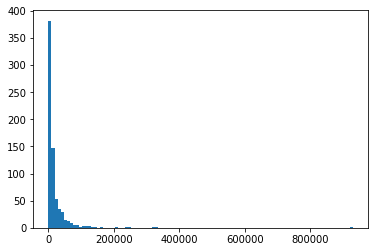

In [32]:
import matplotlib.pyplot as plot

plot.hist(df['Current Price'], bins = 100)
plot.show()

The histogram shows that the top values displayed in the previous section of this tutorial were considerable outliers. In fact, the majority of celebrities possessed then-current prices at very low values, indicating they each had only a small presence within media outlet publications.

Perhaps the distribution of all-time high prices is a bit more egalitarian? It stands to reason that for a celebrity to be a celebrity, they must have, at one point in time, been a focus of media attention. However, the following histogram suggests that celebrity media presence inequality persists over more than just a snapshot in time: most celebrity's highest values never exceeded \\$1,000, while only a very few ever exceeded \\$3,000 at any point.

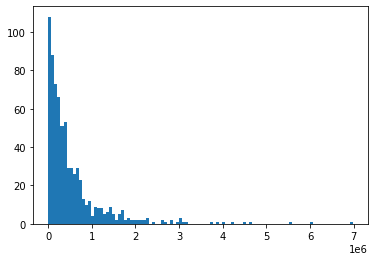

In [33]:
plot.hist(df['All-Time High Price'], bins = 100)
plot.show()

Finally, we may want to observe the distribution of days since each celebrity in the data set achieved their highest value. Was there a certain period of time when celebrities were generally more popular? Is each time point equally likely to observe celebrities at their highest values?

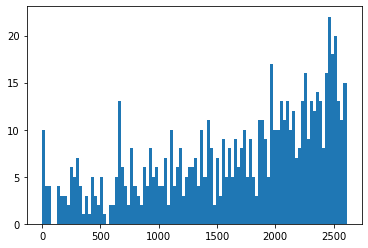

In [34]:
plot.hist(df['Days Since All-Time High Price'], bins = 100)
plot.show()

The histogram above shows that the frequency of peak popularity increases the further back in time we go; celebrities, by and large, do not rise to the same levels of popularity in media outlets today as they used to years ago. One interpretation of this trend is that as social media has ascended in its share of media consumption, print outlets' role as a prime hub for celebrity gossip and information has declined. Celebrity Bucks may wish to expand its list of tracked media sources to ensure it remains current.

### Displaying information for a particular celebrity:

After exploring the data set in its totality, users may wish to display the available information for a given celebrity. This is acheived in a single line of code. Simply insert the first and last name of a desired celebrity within single or double quotes in the code below. The input value is case sensitive.

In [36]:
df[df['Celebrity'] == 'Kobe Bryant']

,Celebrity,Current Ranking,Current Price,Avg. 21-Day Price,Avg. 21-Day Price/Current Price,All-Time High Price,All-Time High Price/Current Price,Days Since All-Time High Price,Gender,Age,Upcoming Birthday,U.S. Nationality,Living Status,Celebrity Bucks Recommendation,Last Update
69,Kobe Bryant,70,47000,13000,0.277,6020000,128.085,318,Male,41.0,No upcoming birthday,U.S. national,Dead,Hold,31:09.7


### Displaying information for celebrities by attributes:

Users may wish to explore the data set to inform game playing decisions.

Suppose you wanted to display all celebrities whom Celebrity Bucks recommends game players buy and sort them by their current price, from least to most expensive:

In [44]:
df[df['Celebrity Bucks Recommendation'] == 'Buy'].sort_values(by='Current Price')

,Celebrity,Current Ranking,Current Price,Avg. 21-Day Price,Avg. 21-Day Price/Current Price,All-Time High Price,All-Time High Price/Current Price,Days Since All-Time High Price,Gender,Age,Upcoming Birthday,U.S. Nationality,Living Status,Celebrity Bucks Recommendation,Last Update
110,Zac Efron,111,34000,4000,0.118,809000,23.794,2432,Male,33.0,No upcoming birthday,U.S. national,Alive,Buy,32:04.8
108,Jon Favreau,109,35000,4000,0.114,308000,8.800,1534,Male,54.0,No upcoming birthday,U.S. national,Alive,Buy,32:01.4
106,Demi Lovato,107,35000,10000,0.286,2623000,74.943,869,Female,28.0,No upcoming birthday,U.S. national,Alive,Buy,31:58.7
99,Blac Chyna,100,38000,4000,0.105,1700000,44.737,1253,Female,32.0,No upcoming birthday,U.S. national,Alive,Buy,31:48.4
98,Ana de Armas,99,38000,9000,0.237,141000,3.711,267,Female,32.0,No upcoming birthday,Foreign to U.S.,Alive,Buy,31:47.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6,Chris Evans,7,211000,17000,0.081,559000,2.649,2057,Male,39.0,No upcoming birthday,U.S. national,Alive,Buy,29:32.0
5,Shia LaBeouf,6,236000,13000,0.055,1206000,5.110,2358,Male,34.0,No upcoming birthday,U.S. national,Alive,Buy,29:30.7
3,Ellen DeGeneres,4,245000,22000,0.090,3039000,12.404,2474,Female,62.0,No upcoming birthday,U.S. national,Alive,Buy,29:26.9
2,Kim Kardashian,3,325000,46000,0.142,2661000,8.188,2392,Female,40.0,No upcoming birthday,U.S. national,Alive,Buy,29:25.6


Now, suppose you had a hunch that players whose current values were relatively low compared to their all-time high were undervalued and were therefore attractive purchasing prospects. You may wish to sort the data set by the `All-Time High Price/Current Price` column, excluding any deceased celebrities, to identify the most attractive celebrity prospects:

In [48]:
df[df['Living Status'] == 'Alive'].sort_values(by='All-Time High Price/Current Price', ascending=False).head(10)

,Celebrity,Current Ranking,Current Price,Avg. 21-Day Price,Avg. 21-Day Price/Current Price,All-Time High Price,All-Time High Price/Current Price,Days Since All-Time High Price,Gender,Age,Upcoming Birthday,U.S. Nationality,Living Status,Celebrity Bucks Recommendation,Last Update
590,Brad Pitt,591,5000,10000,2.000,4213000,842.600,1541,Male,56.0,Upcoming birthday,U.S. national,Alive,Hold,43:47.5
386,Chris Rock,387,7000,2000,0.286,2820000,402.857,1746,Male,55.0,No upcoming birthday,U.S. national,Alive,Hold,38:50.3
568,Jared Leto,569,6000,2000,0.333,2275000,379.167,2474,Male,48.0,No upcoming birthday,U.S. national,Alive,Hold,43:16.0
517,Kevin Spacey,518,6000,1000,0.167,2245000,374.167,1137,Male,61.0,No upcoming birthday,U.S. national,Alive,Hold,41:54.1
667,Spike Lee,668,4000,3000,0.750,1447000,361.750,654,Male,63.0,No upcoming birthday,U.S. national,Alive,Sell,45:38.4
653,Steve Harvey,654,4000,1000,0.250,1446000,361.500,1816,Male,63.0,No upcoming birthday,U.S. national,Alive,Hold,45:19.3
626,R. Kelly,627,5000,3000,0.600,1727000,345.400,645,Male,53.0,No upcoming birthday,U.S. national,Alive,Hold,44:39.6
580,Mick Jagger,581,5000,1000,0.200,1663000,332.600,2459,Male,77.0,No upcoming birthday,Foreign to U.S.,Alive,Hold,43:33.3
411,Amy Poehler,412,7000,1000,0.143,2231000,318.714,2523,Female,49.0,No upcoming birthday,U.S. national,Alive,Hold,39:24.3
648,Jennifer Aniston,649,5000,7000,1.400,1414000,282.800,1952,Female,51.0,No upcoming birthday,U.S. national,Alive,Hold,45:10.3


Brad Pitt, whose value ranked 591st in the data set, had the lowest current price relative to his all-time high. R. Kelly, who ranked 626th, experienced his all-time high less than two years ago, suggesting he may still have the potential to rebound to previous price values.

Similarly, this data set can be used to filter and sort among any other sub-group of interest, such as gender, age group, U.S. nationality, or duration since all-time value. See [Pandas documentation](https://pandas.pydata.org/docs/user_guide/index.html) for tutorials on how to work with Pandas data frames. Alternatively, you may wish to interact with the `.csv` file by other means.

Finally, this data set may be usefully subjected to more advanced analyses, such as supervised machine learning. Users are encouraged to use this data set to train [scikit-learn](https://scikit-learn.org/stable/) predictive models that game players may apply to future data.

## Working with `create_celebrity_data_set.py` to Acquire New Data:

`create_celebrity_data_set.py` can either be executed as a script to generate a new up-to-the-minute data set or it can be imported as a module, where its collection of functions will be availble to users who are interested in a more targeted analytical scope.

### Working with the script:

Let's start by looking at how to execute the script from the command line to create a new, up-to-the-minute data set.

If you have cloned this GitHub repository, simply navigate to the `./celebrity_bucks_game_player advantage/` directory and execute the `create_celebrity_data_set.py` script, as you would any other Python script. You should then see a message that says `API request is successful.`, followed by a statement indicating how many celebrities are currently returned by the Celebrity Bucks API. Subsequently, you will be notified every time the script collects information about ten additional celebrities, and once more to indicate when the script has executed successfully:

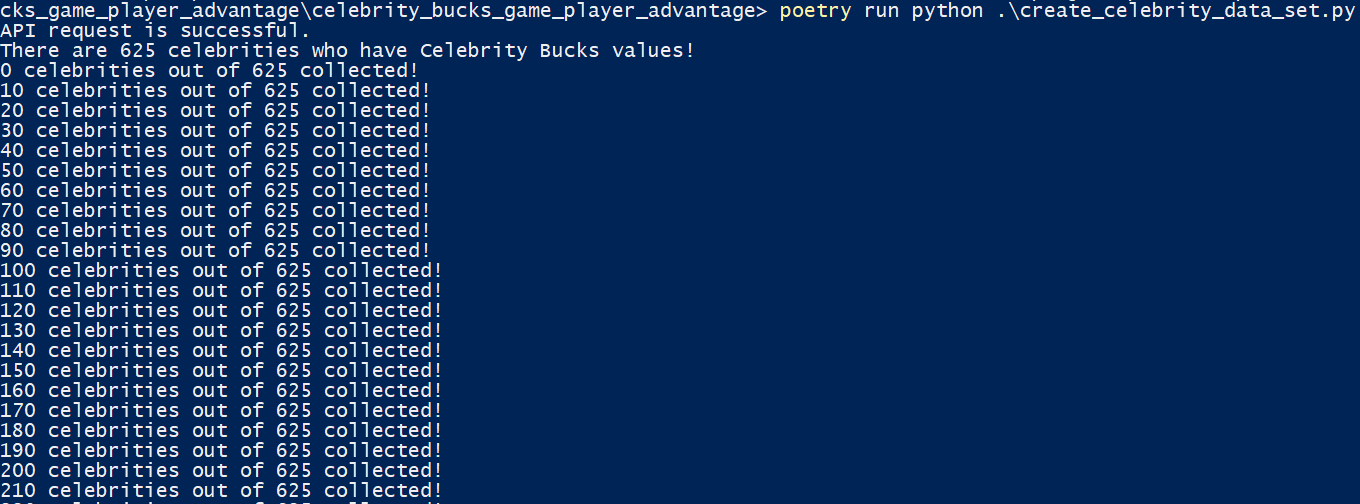

...

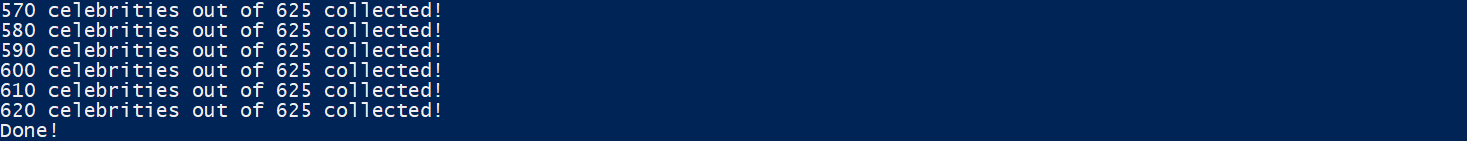

After the script finishes, navigate to the `./data/` folder, where you will find the newly created dataset identifiable by its publication time stamp in the file name:

![image-3](images/image_3.png)

Voila! You're ready to begin your analysis!

### Working with the module:

Suppose you are not interested in compiling an entirely new data set but you still want to access the most current information about a single or a handful of celebrities. In this case, you may prefer to work with this package's functionality interactively. First, enter a Python interpretter from your preferred enviornment and import `create_celebrity_data_set` from `celebrity_bucks_game_player_advantage`. I like to name this `cb`:

In [1]:
from celebrity_bucks_game_player_advantage import create_celebrity_data_set as cb

Then, you'll want to declare a celebrity of interest. Simply assign the first and last name of the celebrity as a string to a `celebrity` object:

In [2]:
celebrity = 'Jimmy Fallon'

Next, you'll want to instantiate the Celebrity Bucks API object and two JSON objects, which collect and contain the current celebrity information. You will need to instantiate new `soup_cb` and `soup_as` objects (representing Celebrity Bucks and Astro-Seek data, respectively) for each celebrity you wish to explore, but you will only need to instantiate the `api_object` once per each session. When you instantiate the `api_object`, you will see a message indicating that the API call was successful, or not, if otherwise:

In [3]:
api_object = cb.get_celebritybucks_api_object()

API request is successful.


In [4]:
soup_cb = cb.get_celebritybucks_soup_object(api_object,celebrity)
soup_as = cb.get_astroseek_soup_object(celebrity)

Next, you may wish to find just a single piece of information about the celebrity, such as whether their birthday is upcoming in the next week, their age, or their all-time high Celebrity Bucks value. Make sure to pass the appropriate soup object to each function in order to successfully retrieve the information:

In [5]:
cb.upcoming_birthday(soup_as)

'No upcoming birthday'

In [6]:
cb.get_age(soup_as)

46

In [7]:
cb.get_all_time_high_price(soup_cb)

1670000

In order to determine which soup object is required in each function, see the "Parameters" section of the documentation available for any function in the package. For example:

In [8]:
help(cb.get_cb_rec)

Help on function get_cb_rec in module celebrity_bucks_game_player_advantage.create_celebrity_data_set:

get_cb_rec(soup_object)
    Returns the current Celebrity Bucks recommendation as to whether game players should buy, hold, or sell a given celebrity. Source: https://celebritybucks.com/celebrities/.
    
    Parameters
    ----------
      soup_object: bs4.BeautifulSoup
        A BeautifulSoup object containing HTML from the Celebrity Bucks webpage corresponding to a given celebrity.
      
    Returns
    -------
    str
       The current Celebrity Bucks recommended action with regard to the celebrity
    
    Examples
    --------
    >>> get_cb_rec(soup_tom_hanks)
    'Buy'
    >>> get_cb_rec(soup_gwyneth_paltrow)
    'Hold'
    >>> get_cb_rec(soup_miley_cyrus)
    'Sell'



Finally, you may wish to accumulate and display all up-to-the-minute data for a given celebrity, formatted identically to one row in the data set introduced earlier. This can be accomplished in a single additional step, provided the celebrity object, API object, and soup objects have already been instantiated:

In [9]:
cb.get_celeb_data(api_object, soup_cb, soup_as, celebrity)

,Celebrity,Current Ranking,Current Price,Avg. 21-Day Price,Avg. 21-Day Price/Current Price,All-Time High Price,All-Time High Price/Current Price,Days Since All-Time High Price,Gender,Age,Upcoming Birthday,U.S. Nationality,Living Status,Celebrity Bucks Recommendation,Last Update
0,Jimmy Fallon,29,65000,15000,0.231,1670000,25.692,2491,Male,46,No upcoming birthday,U.S. national,Alive,Buy,2020-12-15 16:27:37.637557
